In [1]:
import numpy as np
import scipy.spatial
import copy
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc
from classes import Vertex, Edge, Polygon
from functions import *

from init_3D import *

L=1

p=[]

p.append([L/2,L/2,0])
p.append([L,L,L/(2)**(1/2)])
p.append([L/2,3*L/2,2*L/(2)**(1/2)])
p.append([3*L/2,L/2,2*L/(2)**(1/2)])
p.append([L,L,3*L/(2)**(1/2)])
p.append([L/2,L/2,4*L/(2)**(1/2)])

q=[]
q.append([5*L/2,L/2,2*L/(2)**(1/2)])
q.append([3*L,L,L/(2)**(1/2)])
q.append([5*L/2,3*L/2,0])
q.append([3*L/2,3*L/2,0])
q.append([7*L/2,L/2,0])

p_inv=copy.deepcopy(p)
q_inv=copy.deepcopy(q)

p_inv=np.multiply(p_inv,-1)
q_inv=np.multiply(q_inv,-1)


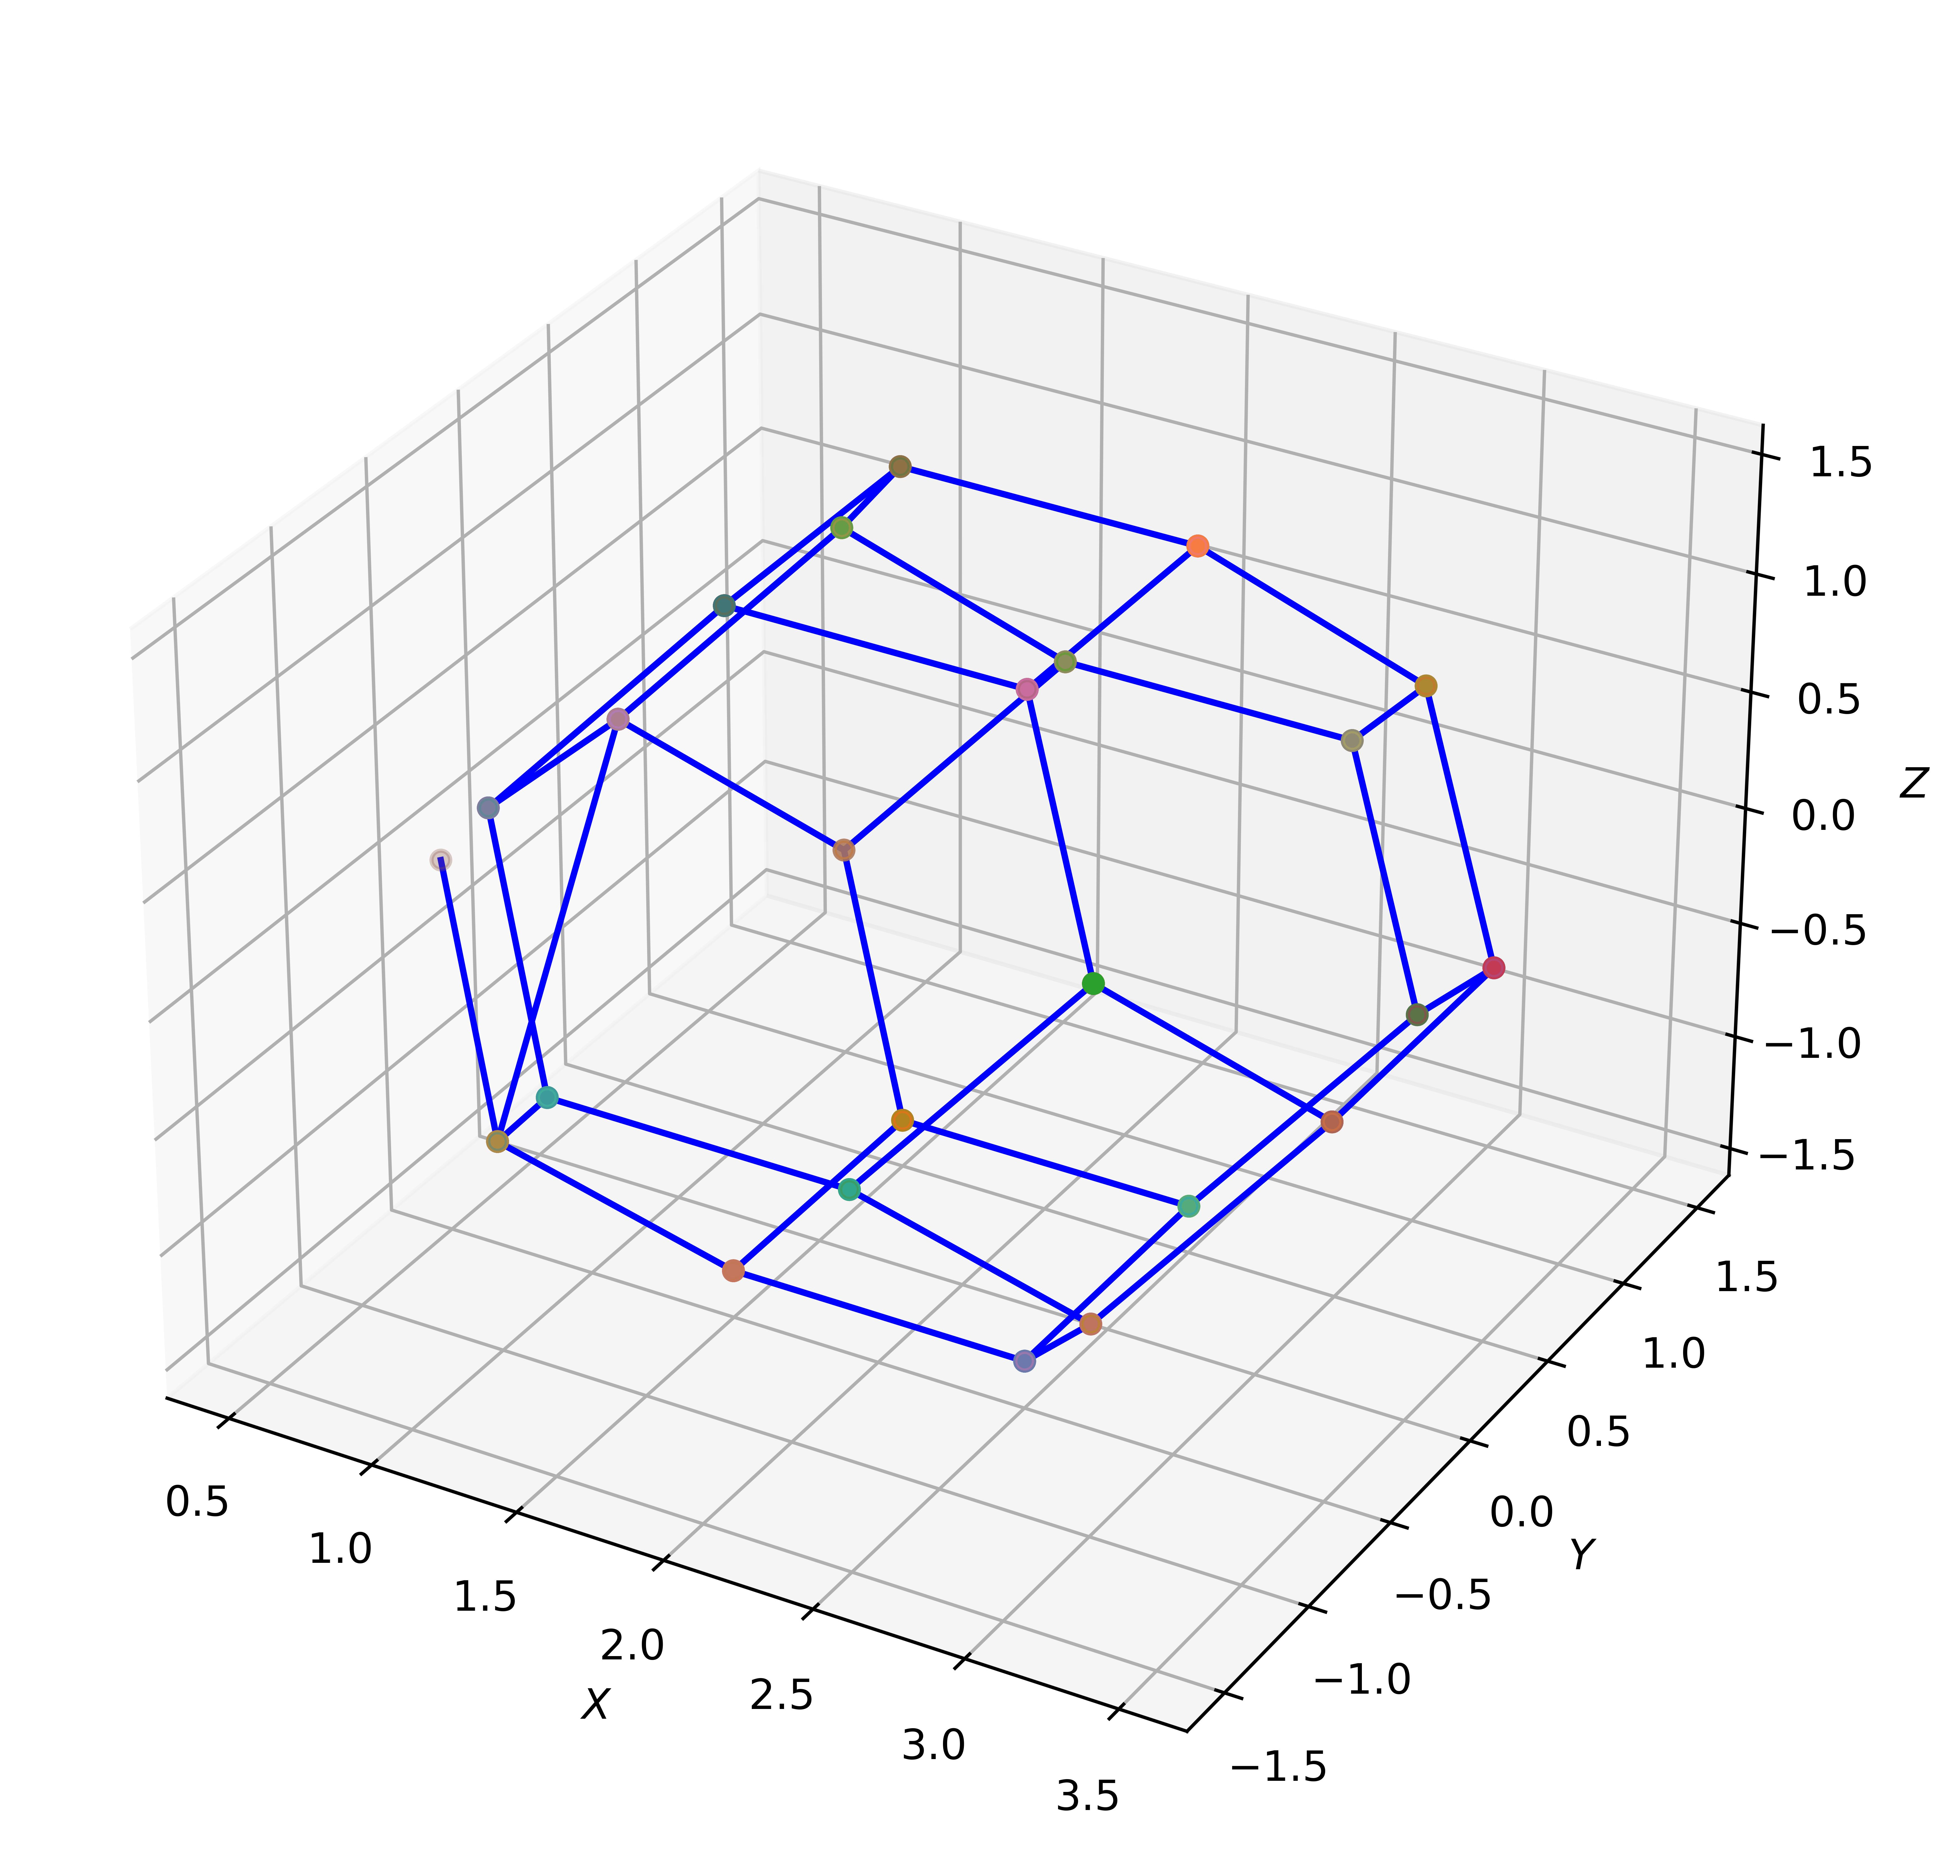

In [2]:
#plotter_3D(np.concatenate((edge_assignments_cell_1(p,q)),axis=0))
#plt.savefig("Figures/3D/bitruncated_hex.png",dpi=1080,bbox_inches="tight",transparent=False)
cell_1=np.concatenate((edge_assignments_cell_1(p,q)),axis=0)
#cell_1=np.concatenate((edge_assignments_cell_2(p,q,state="post")),axis=0)

cell_2=np.concatenate((edge_assignments_cell_2(p,q)),axis=0)

total=np.concatenate((cell_1,cell_2),axis=0)

#plotter_3D(total)









plotter_3D(cell_2)





In [3]:
## The generator point randomizer and the "Monte Carlo" routine to be used for driven dynamics.

def gen_rnd_3D(l,p,q,epsilon,state=None):
    p_f=copy.deepcopy(p)
    q_f=copy.deepcopy(q)
    rng_p=2*epsilon*np.subtract(np.random.rand(len(p),len(p[0])),np.full((len(p),len(p[0])),1/2))
    rng_q=2*epsilon*np.subtract(np.random.rand(len(q),len(q[0])),np.full((len(q),len(q[0])),1/2))

    p_f=np.add(p_f,rng_p)
    q_f=np.add(q_f,rng_q)


    #again, some values need to be fixed to preserve symmetry:
    q_f[2][2]=0
    q_f[3][2]=0
    q_f[4][2]=0

    #finally, the driven point needs to be on axis:
    if state==None: p_f[0]=[l/2,l/2,0]
    if state=="post": p_f[0]=[0,0,l/2]
    return p_f,q_f



def vertex_monte_carlo_3D(l,p,q,epsilon,trials,state=None):
    n=0
    pf,qf=gen_rnd_3D(l,p,q,epsilon,state)
   

    ## polyhedron_assignments outputs the two cells, and these are repeated via reflection...
    energy=2*np.sum([p.energy() for p in  polyhedron_assignments(pf,qf,state)])
    while n<trials:
        pt,qt=gen_rnd_3D(l,p,q,epsilon,state)
        
        
        energy_t=2*np.sum([p.energy() for p in polyhedron_assignments(pt,qt,state)])
        if energy_t<energy:
            pf=copy.deepcopy(pt)
            qf=copy.deepcopy(qt)
            
            energy=energy_t
        n+=1
    
    return pf,qf,energy



## Initializing some polyhedron class parameters. (Different s_0 values will be initialized in the loop)
Polyhedron.v_0=np.mean([p.volume() for p in polyhedron_assignments(p,q)])
Polyhedron.k_v=10000

In [9]:
#Debugging tools:

s_a_init=[poly.surface_area() for poly in polyhedron_assignments(p,q) ]
v_init=[poly.volume() for poly in polyhedron_assignments(p,q) ]
print(s_a_init, v_init)

print(Polyhedron.v_0)

print("Shape parameter for initial shape:", s_a_init[0]/(v_init[0])**(2/3))

[26.784609690826525, 26.784609690826525] [11.313708498984758, 11.31370849898476]
11.31370849898476
Shape parameter for initial shape: 5.314739699971959


s= 4.8
s= 4.8999999999999995
s= 5.0
s= 5.1
s= 5.2
s= 5.3
s= 5.4
s= 5.5


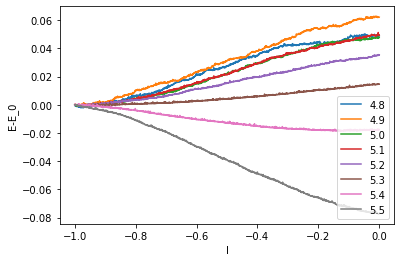

In [21]:
L=1
array,epsilon=np.linspace(L,0,2000,retstep=True)

fig=plt.figure()
for s in np.linspace(4.8,5.5,8):
    print("s=",s)
    Polyhedron.s_0=s
    x=[]
    energy=[]

   

    p=[]
    p.append([L/2,L/2,0])
    p.append([L,L,L/(2)**(1/2)])
    p.append([L/2,3*L/2,2*L/(2)**(1/2)])
    p.append([3*L/2,L/2,2*L/(2)**(1/2)])
    p.append([L,L,3*L/(2)**(1/2)])
    p.append([L/2,L/2,4*L/(2)**(1/2)])

    q=[]
    q.append([5*L/2,L/2,2*L/(2)**(1/2)])
    q.append([3*L,L,L/(2)**(1/2)])
    q.append([5*L/2,3*L/2,0])
    q.append([3*L/2,3*L/2,0])
    q.append([7*L/2,L/2,0])


    
    for length in array:
        pf,qf,e=vertex_monte_carlo_3D(length,p,q,epsilon,10,None)
        
        energy.append(e)
        x.append(-length)
        p=copy.deepcopy(pf)
        q=copy.deepcopy(qf)
        
        #counter+=1
        #if counter%50==0:
        #    print(length)
        #    #print(p,q)
        #    print("Energy=",e)
        #    print([p.volume() for p in polyhedron_assignments(p,q) ],[p.surface_area() for p in polyhedron_assignments(p,q) ])
        #    cell_1=np.concatenate((edge_assignments_cell_1(p,q)),axis=0)
        #    cell_2=np.concatenate((edge_assignments_cell_2(p,q)),axis=0)

        #    total=np.concatenate((cell_1,cell_2),axis=0)
    #counter=0
    #for length in array:
    #    pf,qf,e=vertex_monte_carlo_3D(length,p,q,epsilon,10,"post")
        
    #    energy.append(e)
    #    x.append(length)
    #    p=copy.deepcopy(pf)
    #    q=copy.deepcopy(qf)
        
        #counter+=1
        #if counter%50==0:
        #    print(length)
            #print(p,q)
        #    print("Energy=",e)
        #    print([p.volume() for p in polyhedron_assignments(p,q) ],[p.surface_area() for p in polyhedron_assignments(p,q) ])
        #    cell_1=np.concatenate((edge_assignments_cell_1(p,q)),axis=0)
        #    cell_2=np.concatenate((edge_assignments_cell_2(p,q)),axis=0)

        #    total=np.concatenate((cell_1,cell_2),axis=0)

            #plotter_3D(total)
            #plt.show()
    
    #counter=0
    #for length in reversed(array):
    #    pf,qf,e=vertex_monte_carlo(length,p,q,epsilon,10,"post")
    #print("Energy=",e)
    #    energy.append(e)
    #    x.append(length)
    #    p=copy.deepcopy(pf)
    #    q=copy.deepcopy(qf)
    #    counter+=1
    #    if counter%10==0:
    #        print(length)
    #        print(p,q)
    #        print("Energy=",e)
    #        plotter_2D(np.concatenate(edge_assignments(p,q,"post"),axis=0))
    #        plt.show()
    
    
    plt.plot(x,np.subtract(energy,np.full(len(energy),energy[0])),label=round(s,2) )

plt.legend()
plt.xlabel("l")
plt.ylabel("E-E_0")
plt.show()
#plt.savefig("Figures/3D/transition_3D.png",dpi=1080,bbox_inches="tight",transparent=False)
#plt.close(fig)

In [19]:
np.linspace(4.8,5.5,8)

array([4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5])

In [16]:
phdra= polyhedron_assignments(p,q)
for pols in phdra:
    print(pols.surface_area()/(Polyhedron.v_0)**(2/3))

5.314739699971958
5.314739699971958


In [11]:
L=1

p=[]
p.append([L/2,L/2,0])
p.append([L,L,L/(2)**(1/2)])
p.append([L/2,3*L/2,2*L/(2)**(1/2)])
p.append([3*L/2,L/2,2*L/(2)**(1/2)])
p.append([L,L,3*L/(2)**(1/2)])
p.append([L/2,L/2,4*L/(2)**(1/2)])

q=[]
q.append([5*L/2,L/2,2*L/(2)**(1/2)])
q.append([3*L,L,L/(2)**(1/2)])
q.append([5*L/2,3*L/2,0])
q.append([3*L/2,3*L/2,0])
q.append([7*L/2,L/2,0])